<a href="https://colab.research.google.com/github/rishitharaj/car-price-prediction-machine-learning/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Assignments/ML Module End Project/Car Price Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

car_ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
symboling: [ 3  1  2  0 -1 -2]
CarName: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 500

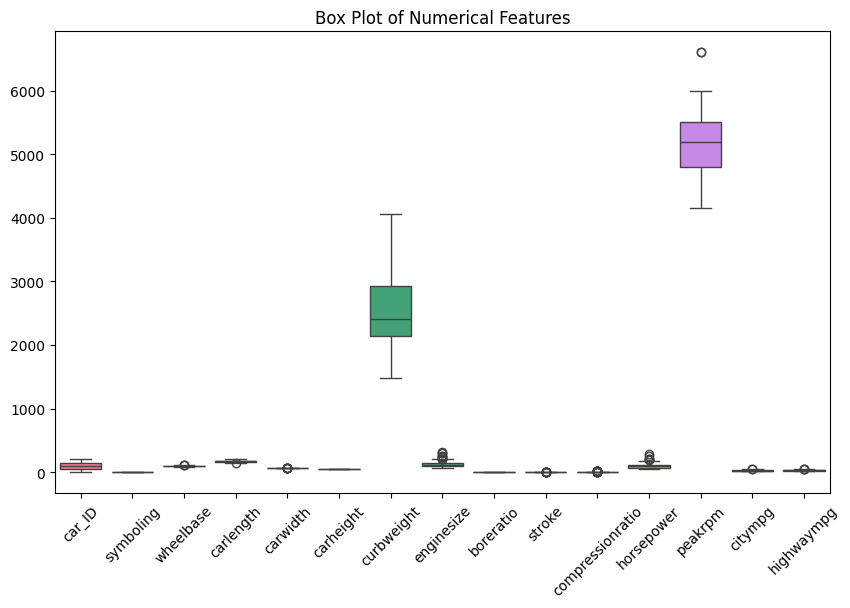

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop('price', axis=1))
plt.title("Box Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# No Null Value
# Have Dtype as Object - needs encoding
# Target column - Price

In [12]:
df = df.drop('car_ID', axis=1)

In [13]:
# Encoding
df = pd.get_dummies(df, drop_first=True)

In [14]:
# Train Test Split

X = df.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
# Scaling for SVR model and Linear Models

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [16]:
# Helper function

def evaluate_model(model, X_tr, X_te, y_tr, y_te):
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)

    return {
        "R2": r2_score(y_te, y_pred),
        "MSE": mean_squared_error(y_te, y_pred),
        "MAE": mean_absolute_error(y_te, y_pred)
    }


In [17]:
# Linear Regression

lr = LinearRegression()
lr_results = evaluate_model(lr, X_train_scaled, X_test_scaled, y_train, y_test)


In [18]:
# DecisionTree

dt = DecisionTreeRegressor(random_state=42)
dt_results = evaluate_model(dt, X_train, X_test, y_train, y_test)


In [19]:
# Randomforest

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_results = evaluate_model(rf, X_train, X_test, y_train, y_test)


In [20]:
# Gradient Boosting Regressor

gb = GradientBoostingRegressor(random_state=42)
gb_results = evaluate_model(gb, X_train, X_test, y_train, y_test)


In [21]:
# Support Vector Regressor

svr = SVR(kernel='rbf')
svr_results = evaluate_model(svr, X_train_scaled, X_test_scaled, y_train, y_test)


In [22]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "SVR"],
    "R2 Score": [
        lr_results["R2"],
        dt_results["R2"],
        rf_results["R2"],
        gb_results["R2"],
        svr_results["R2"]
    ],
    "MSE": [
        lr_results["MSE"],
        dt_results["MSE"],
        rf_results["MSE"],
        gb_results["MSE"],
        svr_results["MSE"]
    ],
    "MAE": [
        lr_results["MAE"],
        dt_results["MAE"],
        rf_results["MAE"],
        gb_results["MAE"],
        svr_results["MAE"]
    ]
})

results


,Model,R2 Score,MSE,MAE
0,Linear Regression,0.492455,4.006768e+07,4160.851580
1,Decision Tree,0.855898,1.137602e+07,2200.142268
2,Random Forest,0.953457,3.674318e+06,1365.352512
3,Gradient Boosting,0.930597,5.478929e+06,1700.986585
4,SVR,-0.101709,8.697331e+07,5705.033285


**✅ Best Model: Random Forest Regressor**

Among all the models evaluated, the Random Forest Regressor performed the best with the highest R² score of 0.9537 and the lowest MSE and MAE.

This indicates that the model explains approximately 95% of the variance in car prices and provides highly accurate predictions.

Ensemble models like Random Forest and Gradient Boosting significantly outperformed Linear Regression and SVR, highlighting the presence of non-linear relationships and feature interactions in car pricing data. Therefore, Random Forest is recommended for understanding pricing dynamics and supporting business decision-making in the US automobile market.



In [23]:
# Feature Importance

importances = rf.feature_importances_
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
6,enginesize,0.540808
5,curbweight,0.294927
13,highwaympg,0.043387
10,horsepower,0.038275
3,carwidth,0.013358
2,carlength,0.007710
12,citympg,0.006580
1,wheelbase,0.006204
11,peakrpm,0.005753
8,stroke,0.004195


**Top Influencing Features:**
- Engine Size
- Curb Weight
- highwaympg
- Horsepower
- Car Width

👉 These features strongly impact car pricing in the US market.

In [24]:
# Hyperparameter tuning

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [25]:
best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)

print("Tuned Random Forest Performance")
print("R2:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("Default Random Forest Performance")
print(results.iloc[2])


Tuned Random Forest Performance
R2: 0.9556481400375855
MSE: 3501314.1589245056
MAE: 1333.2983417276732
Default Random Forest Performance
Model        Random Forest
R2 Score          0.953457
MSE         3674318.218352
MAE            1365.352512
Name: 2, dtype: object


The tuned Random Forest model predicts car prices within ±$1,333

of the actual price on average, compared to ±$1,365 for the default model. This reduction in error means the tuned model provides more precise and reliable pricing estimates, which can help management make better pricing and product design decisions in the US automobile market.
